In [1]:
import osmuf as ouf

In [2]:
# dictionary of places of interest for convenience, 
places = {0:{'name':'buenos_aires', 'coordinates':(-34.5798,-58.4422),},
          1:{'name':'kaduna', 'coordinates':(10.53364, 7.37360),},
          2:{'name':'margery_street', 'coordinates':(51.5266,-0.1109),},
          3:{'name':'posadas', 'coordinates':(-27.37577,-55.90059),},
          4:{'name':'welwyn_garden_city', 'coordinates':(51.7938,-0.18645),},
          5:{'name':'hayes_lane', 'coordinates':(51.39425,-0.003),}
         }

# bounding box half-distance in meters
distance=500

In [3]:
place=places[5]

place_name=place['name']
point=place['coordinates']

# 01 - Urban blocks, form factor
Here, the form factor of a block is defined as "the ratio between the area of the block and the area of the circumscribed circle". (Barthélemy M. and Louf R., 2014)

"The distributions of F displays important differences from one city to another, and a first naive idea would be to classify cities according to the distribution of block shapes given by P(F). The shape itself is however not enough to account for visual similarities and dissimilarities between street patterns." (ibid.)

On its own this isn't enough to generate a 'fingerprint' by which cities can be classified we "need to combine the information about both the shape and the area." (ibid.)

The work is based on gross urban blocks generated from OpenStreetMap's highway network, by binning the blocks' form factors they categorize zones within a city.

*Ref:*

Barthélemy, M., & Louf, R. (2014). A typology of street patterns. J. R. Soc. Interface, 11.

In [5]:
# retrieve the data
study_area = ouf.study_area_from_point(point, distance)
city_blocks = ouf.city_blocks_from_point(point, distance)
buildings = ouf.buildings_from_gdf(city_blocks)
street_graph = ouf.street_graph_from_gdf(city_blocks)
streets = ouf.streets_from_street_graph(street_graph)

In [6]:
# process the data
city_blocks, city_blocks_gross = ouf.gen_city_blocks_gross(street_graph, city_blocks)
city_blocks_form_factor = ouf.form_factor(city_blocks)

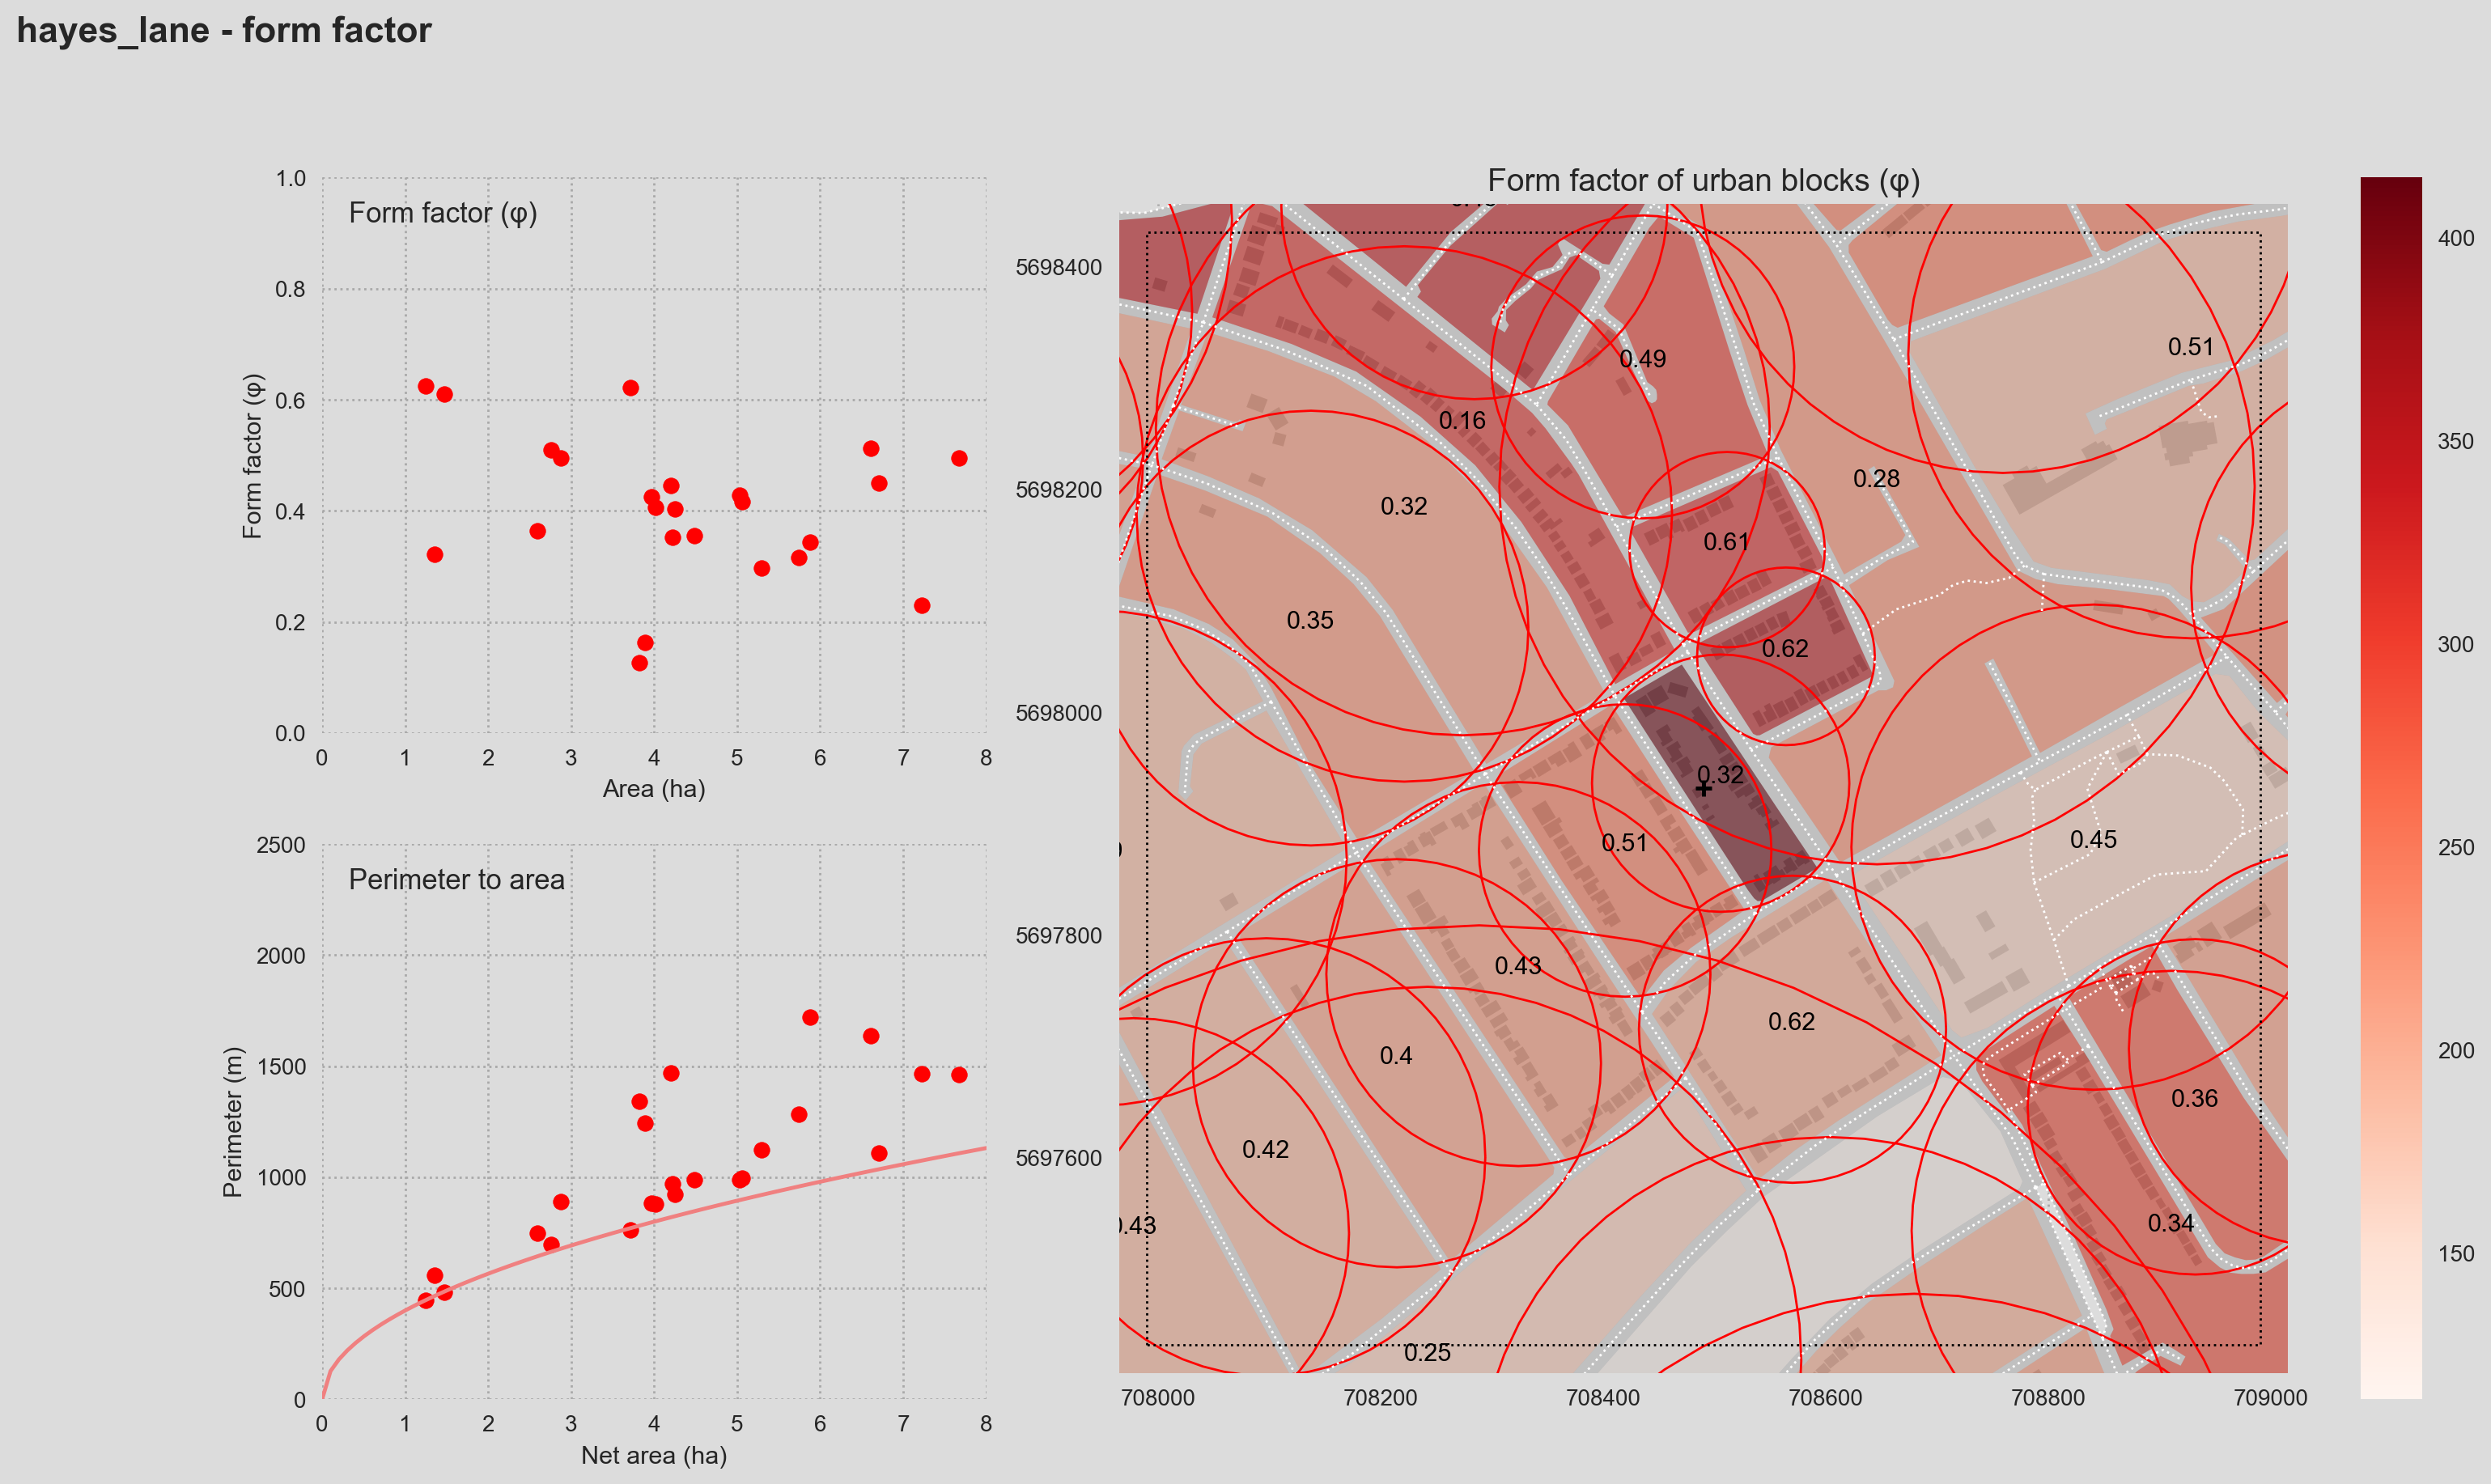

In [7]:
# plot the data
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - form factor', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_form_factor_to_area(ax[0], city_blocks_form_factor)
ouf.ax_block_perimeter_to_area(ax[1], city_blocks)
ouf.ax_map_form_factor(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings, city_blocks_form_factor)

fig.savefig('../local_images/01_blocks_form_factor_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')